# Avançando no Machine Learning: Classificação
---- 

## Aula 1: Classificação

### `Importando Bibliotecas`

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


### Importando os dados

In [23]:
df = pd.read_csv('./dados/Customer-Churn.csv')
df.shape

(7043, 18)

In [24]:
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


### Diferentes varíaveis

In [25]:
# Binarizando colunas categoricas 
traducao_dic = {'Sim': 1,
                'Nao': 0}

datamod = df[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
datamod

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [26]:
# Transformação pelo get dummies
data_dummies = pd.get_dummies(df.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                      axis = 1))

# Junção dos dados transformados com os que já tinhamos 
df_final = pd.concat([datamod, data_dummies], axis =1)

In [27]:
df_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


In [28]:
df_final.shape

(7043, 39)

### Balanceando dados

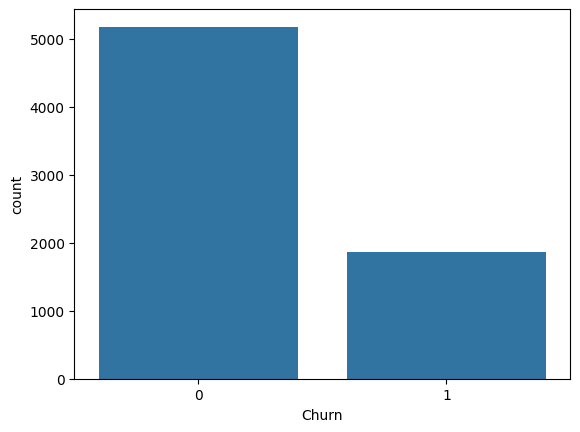

In [29]:
# Checando se há desbalanceamento nos dados
ax = sns.countplot(x='Churn', data=df_final)

In [30]:
# Usando o SMOTE para realizar o balanceamento
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from imblearn.over_sampling import SMOTE

X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']


# Realizando a reamostragem do conjunto de dados
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)  

df_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df_final.head(2)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,...,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,...,False,False,False,False,True,False,False,True,False,0


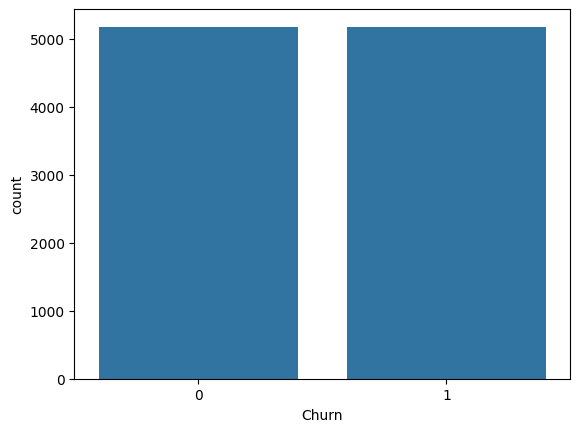

In [32]:
# Checando se a variavel target ficou balanceada
ax = sns.countplot(x='Churn', data=df_final)  

## Aula 2: Método baseado em proximidade
---

### Introdução ao Algoritimo KNN

In [33]:
# Divisão dos dados
X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']

In [34]:
# Biblioteca para padronizar os dados 
from sklearn.preprocessing import StandardScaler

In [35]:
# Instanciando o StandardScaler
norm = StandardScaler()

In [36]:
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ]])

In [37]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81465673, -0.41350409,
       -1.10771299, -1.32176003, -0.99594945,  3.06083934, -0.93540224,
        1.48315631, -1.05853285, -0.44850949,  0.77851405, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35092813,  0.91935908,
       -0.44850949, -0.73960631,  0.7857356 , -0.44850949, -0.60652979,
        1.08898545, -0.44850949, -0.84621879,  1.10588699, -0.44850949,
       -0.85804523, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
        1.05382378, -0.54742438, -0.5311508 ])

### Implementando o KNN

In [38]:
# Importando modelo
from sklearn.model_selection import train_test_split

In [39]:
# Separando Treino e Test
X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size = 0.3, random_state = 123)

### Treino e teste

In [40]:
# importanto o KNN
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Instanciando e rodando KNN
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [42]:
# Testando o modelo com os dados de teste 
pred_knn = knn.predict(X_test)
pred_knn

array([1, 0, 0, ..., 0, 1, 1])

## Aula 3: Método Probabilístico

---

### Introdução Naïve Bayes

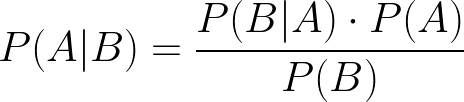

Onde:

* $P(B|A)$: probabilidade de B acontecer dado que A já aconteceu;
* $P(A)$: probabilidade de A acontecer;
* $#P(B)$: probabilidade de B acontecer.

### Treino e teste

In [43]:
# Importando biblioteca
from sklearn.naive_bayes import BernoulliNB

In [54]:
# Uso da mediana (valor central) para definir um limite
np.mean(X_train)

9.02654232410766e-05

In [60]:
# Criando o modelo com (binarize = median)
bnb = BernoulliNB(binarize= 0.44)

In [61]:
# Treinando modelo
bnb.fit(X_train,y_train)

BernoulliNB(binarize=0.44)

In [62]:
# Predição
pred_BNb = bnb.predict(X_test)
pred_BNb

array([1, 0, 0, ..., 1, 1, 1])

## Aula 4: Método Simbílico

---

### Introdução Árvore de Decisão

#### Índice Gini

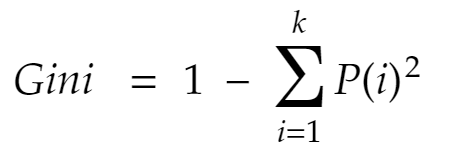

Onde:

* $pi$ representa a frequência relativa das classes em cada um dos nós;
* $k$ é o número de classes.

`Foco na pureza do nó, quanto mais próximo de 0 melhor`

### Entropia

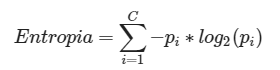

Onde:

* $pi$ representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica $i$;
* $c$ é o número de classes.

`Foca no ganho de informação, quanto menor a entropia mais organozado e melhor`

### Treino Teste

In [63]:
# importando Biblioteca
from sklearn.tree import DecisionTreeClassifier

In [163]:
# Instanciando modelo
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [164]:
# Treinando modelo
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [165]:
# Verificar variaveis mais importantes 
dt.feature_importances_

array([0.01931254, 0.01498402, 0.0022466 , 0.02050024, 0.01536196,
       0.15277778, 0.20830899, 0.00850824, 0.00387764, 0.01559183,
       0.00604003, 0.00145612, 0.        , 0.05344973, 0.        ,
       0.01661545, 0.00797701, 0.        , 0.00989292, 0.00962338,
       0.        , 0.01089861, 0.01428183, 0.        , 0.01501346,
       0.00533724, 0.        , 0.00490741, 0.00814576, 0.        ,
       0.01870869, 0.00893017, 0.23348935, 0.02775035, 0.01662939,
       0.03572187, 0.01351081, 0.02015059])

In [166]:
# Predição
pred_dt = dt.predict(X_test)
pred_dt

array([0, 0, 0, ..., 0, 1, 1])

## Aula 5: Validação dos modelos

### Matriz de Consfusão


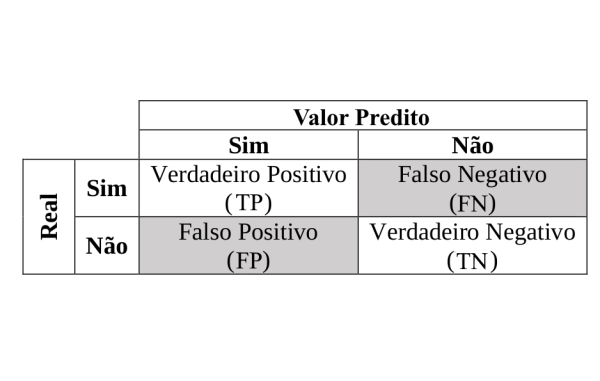

In [167]:
# Importando bibliotecas
from sklearn.metrics import confusion_matrix

In [168]:
# Matrix de confusão KNN
print(confusion_matrix(y_test, pred_knn))

[[1245  324]
 [ 264 1272]]


In [169]:
# Matrix de confusão Bayes
print(confusion_matrix(y_test, pred_BNb))

[[1060  509]
 [ 210 1326]]


In [170]:
# Matrix de confusão Decison Forest
print(confusion_matrix(y_test, pred_dt))

[[1288  281]
 [ 287 1249]]


#### `Acurácia`

In [171]:
# Importando Biblioteca para calculo da acurácia
from sklearn.metrics import accuracy_score

In [172]:
# Acurácia modelo KNN
print(f'Acurácia KNN: {round(accuracy_score(y_test, pred_knn), 4)}')

# Acurácia modelo Bayes
print(f'Acurácia Bernoulli de Naive Bayes: {round(accuracy_score(y_test, pred_BNb), 4)}')

# Acurácia modelo Decision Forest
print(f'Acurácia Decision Forest: {round(accuracy_score(y_test, pred_dt), 4)}')

Acurácia KNN: 0.8106
Acurácia Bernoulli de Naive Bayes: 0.7684
Acurácia Decision Forest: 0.8171


#### `Precisão`

In [173]:
# Importando Biblioteca para calculo de precisão
from sklearn.metrics import precision_score

In [174]:
# Precision modelo KNN
print(f'Precisão KNN: {round(precision_score(y_test, pred_knn),4)}')

# Precision modelo KNN
print(f'Precisão Bernoulli de Naive Bayes: {round(precision_score(y_test, pred_BNb),4)}')

# Precision modelo KNN
print(f'Precisão Decision Forest: {round(precision_score(y_test, pred_dt),4)}')

Precisão KNN: 0.797
Precisão Bernoulli de Naive Bayes: 0.7226
Precisão Decision Forest: 0.8163


#### `Recall`

In [175]:
# Importando Biblioteca para calculo do Recall
from sklearn.metrics import recall_score

In [176]:
# Recall modelo KNN
print(f'Precisão KNN: {round(recall_score(y_test, pred_knn),4)}')

# Recall modelo  Naice Bayes
print(f'Precisão Bernoulli de Naive Bayes: {round(recall_score(y_test, pred_BNb),4)}')

# Recall modelo Decision Forest
print(f'Precisão Decision Forest: {round(recall_score(y_test, pred_dt),4)}')

Precisão KNN: 0.8281
Precisão Bernoulli de Naive Bayes: 0.8633
Precisão Decision Forest: 0.8132


Foi escolhidoa a precisão como melhor métrica para a situação apresentada,logo o modelo de Arvore de Decisão foi eleito o melhor para definir potenciais 'churns' com 81.71%